<a href="https://colab.research.google.com/github/skadoosh4/trained_models/blob/main/Pytorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network classification with PyTorch

### 1. Make classification data and get it ready

In [ ]:
import sklearn
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles

In [ ]:
#Make 1000 samples

n_samples = 1000

# Create circles
X , y = make_circles(n_samples,
                     noise = 0.03,
                     random_state = 42)

In [ ]:
len(X) , len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of Y : \n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of Y : 
 [1 1 1 1 0]


In [ ]:

circles = pd.DataFrame({"X1" : X[:,0],
                        "X2" : X[:,1],
                        "label" : y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


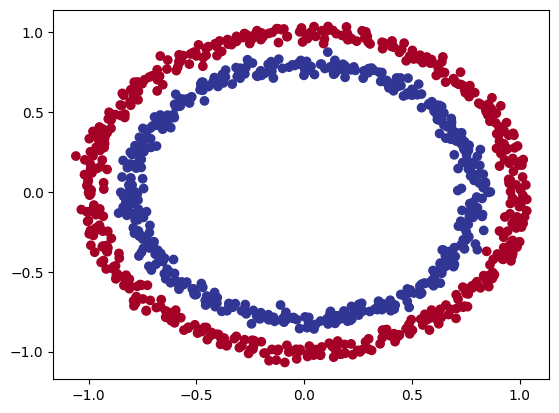

In [ ]:
#Visualize
plt.scatter(x = X[:,0],
            y = X[:,1],
            c = y,
            cmap = plt.cm.RdYlBu)

In [ ]:
X.shape , y.shape

((1000, 2), (1000,))

In [ ]:
#View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y : {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y : ()


In [ ]:
#Turn Data into Tensors and create and train and test splits

#Turn data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [ ]:
#split data into training and test sets
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size = 0.2,
                                                       random_state = 42)

In [ ]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(800, 200, 800, 200)

###2. Building a model
 To Do:
 1. Setup device agnostic code
 2. Construct a model
 3. Define loss function and optimizer
 4. Create a training and test loop


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class CirclesModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.linear layers
    self.layer_1 = nn.Linear(in_features = 2 , out_features = 10)
    self.layer_2 = nn.Linear(in_features=10 , out_features = 10)
    self.layer_3 = nn.Linear(in_features=10 , out_features=1)

  def forward(self , x : torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.layer_2(self.layer_1(x)))

model = CirclesModelV0().to(device)

In [ ]:
model

CirclesModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6565,  0.0886],
                      [ 0.2957, -0.6966],
                      [-0.2481, -0.5848],
                      [ 0.5694, -0.0473],
                      [-0.5164,  0.3325],
                      [-0.0580,  0.2017],
                      [ 0.1482,  0.5791],
                      [-0.6879, -0.5957],
                      [ 0.0502, -0.6736],
                      [-0.3677,  0.2856]])),
             ('layer_1.bias',
              tensor([ 0.5746,  0.2779, -0.0358, -0.6341, -0.4349, -0.1377, -0.1841,  0.4163,
                      -0.4959, -0.3708])),
             ('layer_2.weight',
              tensor([[ 0.2479,  0.1938, -0.2591, -0.2082, -0.0358, -0.2647,  0.2809,  0.1558,
                        0.2061, -0.3128],
                      [ 0.1774,  0.1118, -0.0872, -0.2687, -0.2305, -0.2305,  0.2229, -0.0116,
                        0.1841, -0.2433],
                      [-0.2611, -0.2121, -0.0015,  0.1379, -0.2473, -0.1

In [ ]:
with torch.inference_mode():
  untrained_preds = model(X_test.to(device))
print(f"Length of predictions : {len(untrained_preds)} , Shape : {untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)} ,Shape : {X_test.shape}")
print(f"\n First 10 predictions :\n{untrained_preds[:10].squeeze(dim=1)}")
print(f"\nFirst 10 labels : \n {y_test[:10]}")

Length of predictions : 200 , Shape : torch.Size([200, 1])
Length of test samples : 200 ,Shape : torch.Size([200, 2])

 First 10 predictions :
tensor([ 0.1055,  0.2209, -0.0292,  0.1430,  0.2373,  0.3057,  0.4195,  0.4400,
        -0.0402,  0.2316])

First 10 labels : 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10] , y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.01)

In [ ]:
#Calculate Accuracy
def accuracy_fn(y_pred , y_true):
  correct = torch.eq(y_true , y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model.train()

  y_logits = model(X_train).squeeze()

  y_pred = torch.round(torch.sigmoid(y_logits))

  acc = accuracy_fn(y_pred= y_pred , y_true= y_train)

  loss = loss_fn(y_logits , y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()

    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits , y_test)

    test_acc = accuracy_fn(y_pred= test_pred , y_true= y_test)

  if epoch!=0 and epoch % 100 == 0:
    print(f"Epoch : {epoch} | Training Loss : {loss:.5f}% | Training accuracy : {acc:.2f}% | Test Loss : {test_loss:.5f}% | Test accuracy : {test_acc : .2f}%")

Epoch : 100 | Training Loss : 0.69586% | Training accuracy : 52.38% | Test Loss : 0.70043% | Test accuracy :  49.50%
Epoch : 200 | Training Loss : 0.69465% | Training accuracy : 51.25% | Test Loss : 0.69894% | Test accuracy :  47.00%
Epoch : 300 | Training Loss : 0.69412% | Training accuracy : 51.38% | Test Loss : 0.69815% | Test accuracy :  48.00%
Epoch : 400 | Training Loss : 0.69383% | Training accuracy : 50.25% | Test Loss : 0.69763% | Test accuracy :  48.50%
Epoch : 500 | Training Loss : 0.69363% | Training accuracy : 50.62% | Test Loss : 0.69722% | Test accuracy :  48.50%
Epoch : 600 | Training Loss : 0.69349% | Training accuracy : 50.25% | Test Loss : 0.69690% | Test accuracy :  48.50%
Epoch : 700 | Training Loss : 0.69338% | Training accuracy : 50.25% | Test Loss : 0.69662% | Test accuracy :  47.50%
Epoch : 800 | Training Loss : 0.69329% | Training accuracy : 50.25% | Test Loss : 0.69639% | Test accuracy :  48.00%
Epoch : 900 | Training Loss : 0.69323% | Training accuracy : 50.

In [ ]:
### Make predictions and evaluate the model
import requests
from pathlib import Path

#Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("Helper functions already exists")
else:
  print("Downloading helper functions ........")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py" , "wb") as f:
    f.write(request.content)

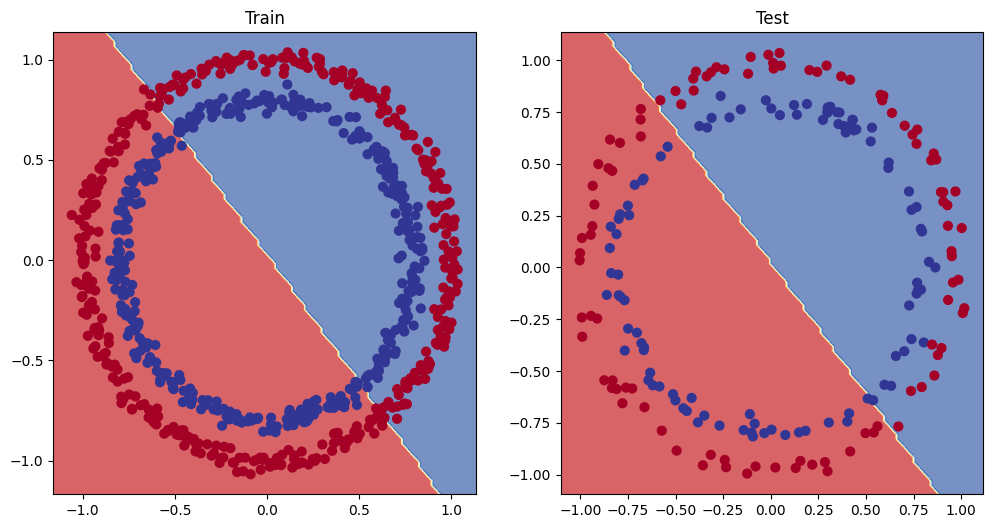

In [ ]:
from helper_functions import plot_predictions , plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model , X_train , y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model , X_test , y_test)

In [ ]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start , end , step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

In [ ]:
train_split = int(0.8 * len(X_regression))
X_train_regression , y_train_regression = X_regression[:train_split] , y_regression[:train_split]
X_test_regression , y_test_regression = X_regression[train_split: ]  , y_regression[train_split:]

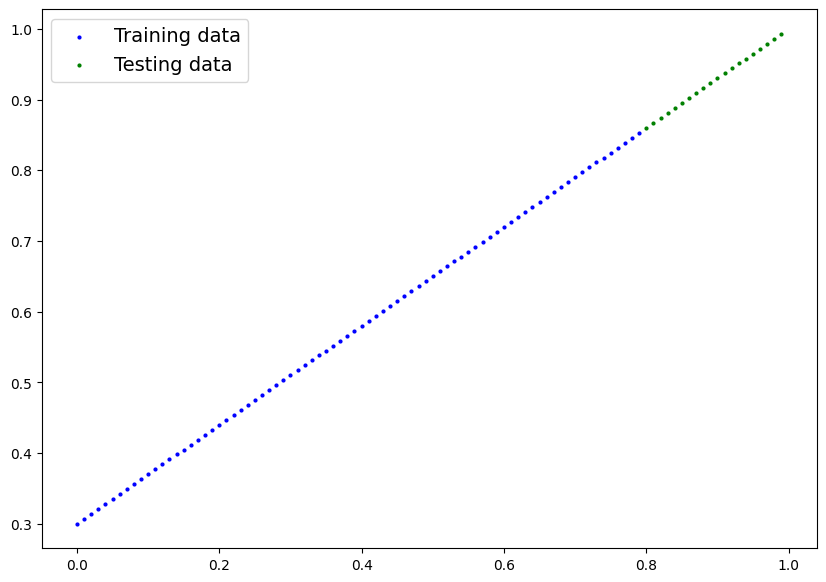

In [ ]:
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression ,
                 test_labels = y_test_regression)

In [ ]:
model_1 = nn.Sequential(
    nn.Linear(in_features = 1 , out_features = 10),
    nn.Linear(in_features = 10 , out_features = 10),
    nn.Linear(in_features = 10 , out_features = 1)
).to(device)

In [ ]:
loss_fn_1 = nn.L1Loss()

optimizer_1 = torch.optim.SGD(params = model_1.parameters(),
                              lr = 0.01)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_regression , y_train_regression = X_train_regression.to(device) , y_train_regression.to(device)
X_test_regression , y_test_regression = X_test_regression.to(device) , y_test_regression.to(device)


for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train_regression)

  loss = loss_fn_1(y_pred , y_train_regression)

  optimizer_1.zero_grad()

  loss.backward()

  optimizer_1.step()

  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test_regression)

    test_loss = loss_fn_1(test_pred , y_test_regression)

  if epoch!=0 and epoch % 100 == 0:
    print(f"Epoch : {epoch} | Loss : {loss:.5f} | Test Loss : {test_loss:.5f}")

Epoch : 100 | Loss : 0.02858 | Test Loss : 0.00081
Epoch : 200 | Loss : 0.02533 | Test Loss : 0.00209
Epoch : 300 | Loss : 0.02137 | Test Loss : 0.00305
Epoch : 400 | Loss : 0.01964 | Test Loss : 0.00341
Epoch : 500 | Loss : 0.01940 | Test Loss : 0.00387
Epoch : 600 | Loss : 0.01903 | Test Loss : 0.00379
Epoch : 700 | Loss : 0.01878 | Test Loss : 0.00381
Epoch : 800 | Loss : 0.01840 | Test Loss : 0.00329
Epoch : 900 | Loss : 0.01798 | Test Loss : 0.00360


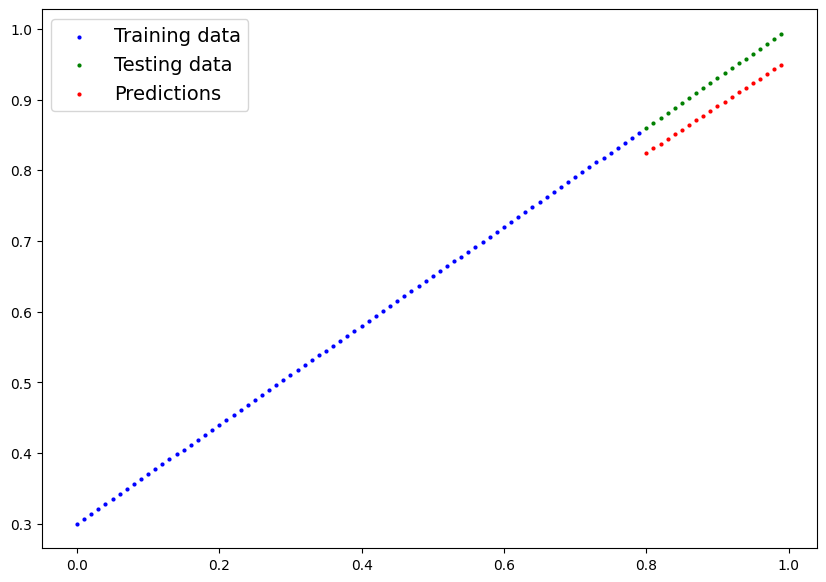

In [ ]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test_regression)

plot_predictions(train_data = X_train_regression.cpu(),
                 train_labels = y_train_regression.cpu(),
                 test_data = X_test_regression.cpu(),
                 test_labels = y_test_regression.cpu(),
                 predictions = y_preds.cpu())

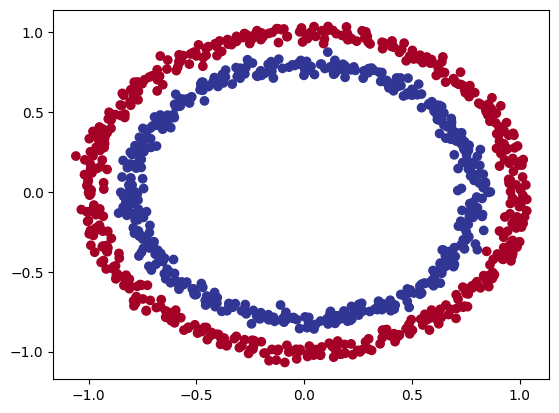

In [ ]:
#Make an plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X , y = make_circles(n_samples,
                     noise = 0.03,
                     random_state = 42)

plt.scatter(X[: , 0] , X[: , 1] , c = y , cmap = plt.cm.RdYlBu)

In [ ]:
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

#Split into train and test sets
X_train , X_test , y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size = 0.2,
                                                       random_state = 42)


In [ ]:
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2 , out_features=10)
    self.layer_2 = nn.Linear(in_features=10 , out_features=10)
    self.layer_3 = nn.Linear(in_features=10 , out_features=1)
    self.relu = nn.ReLU()

  def forward(self , x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [ ]:
model_2 = CircleModelV2().to(device)
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn_2 = nn.BCEWithLogitsLoss()
optimizer_2 = torch.optim.SGD(params = model_2.parameters(),
                              lr = 0.01)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

epochs = 10000

for epoch in range(epochs):
  model_2.train()

  y_logits = model_2(X_train).squeeze()

  y_pred = torch.round(torch.sigmoid(y_logits))

  acc = accuracy_fn(y_pred=y_pred , y_true= y_train)

  loss = loss_fn_2(y_logits , y_train)

  optimizer_2.zero_grad()

  loss.backward()

  optimizer_2.step()

  model_2.eval()

  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()

    test_pred = torch.round(torch.sigmoid(test_logits))

    test_acc = accuracy_fn(y_pred= test_pred , y_true = y_test)

    test_loss = loss_fn_2(test_logits , y_test)

  if epoch!=0 and epoch % 100 ==0 :
    print(f"Epoch : {epoch} | Train Loss : {loss:.5f} | Train Accuracy : {acc:.2f}% | Test Loss : {test_loss:.5f} | Test Accuracy : {test_acc:.2f}%")


Epoch : 100 | Train Loss : 0.35698 | Train Accuracy : 98.12% | Test Loss : 0.39531 | Test Accuracy : 93.00%
Epoch : 200 | Train Loss : 0.34500 | Train Accuracy : 98.38% | Test Loss : 0.38530 | Test Accuracy : 93.50%
Epoch : 300 | Train Loss : 0.33282 | Train Accuracy : 98.38% | Test Loss : 0.37549 | Test Accuracy : 93.50%
Epoch : 400 | Train Loss : 0.32078 | Train Accuracy : 98.38% | Test Loss : 0.36536 | Test Accuracy : 93.50%
Epoch : 500 | Train Loss : 0.30893 | Train Accuracy : 98.50% | Test Loss : 0.35493 | Test Accuracy : 95.00%
Epoch : 600 | Train Loss : 0.29719 | Train Accuracy : 98.62% | Test Loss : 0.34465 | Test Accuracy : 95.00%
Epoch : 700 | Train Loss : 0.28567 | Train Accuracy : 98.75% | Test Loss : 0.33434 | Test Accuracy : 95.50%
Epoch : 800 | Train Loss : 0.27437 | Train Accuracy : 99.00% | Test Loss : 0.32369 | Test Accuracy : 95.50%
Epoch : 900 | Train Loss : 0.26344 | Train Accuracy : 99.00% | Test Loss : 0.31307 | Test Accuracy : 96.00%
Epoch : 1000 | Train Loss : 

In [ ]:
model_2.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_2(X_test))).squeeze()

y_preds[:10] , y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

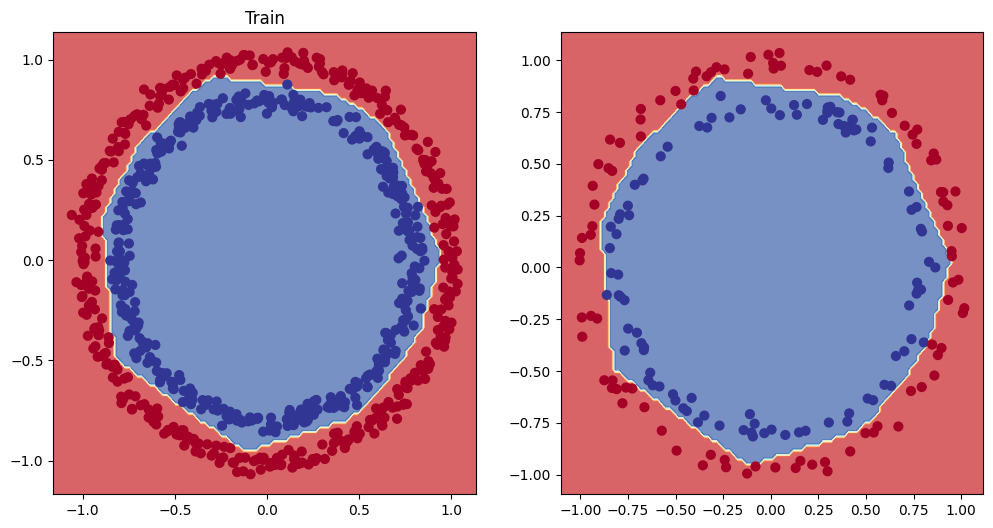

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2 , X_train , y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_2 , X_test , y_test)

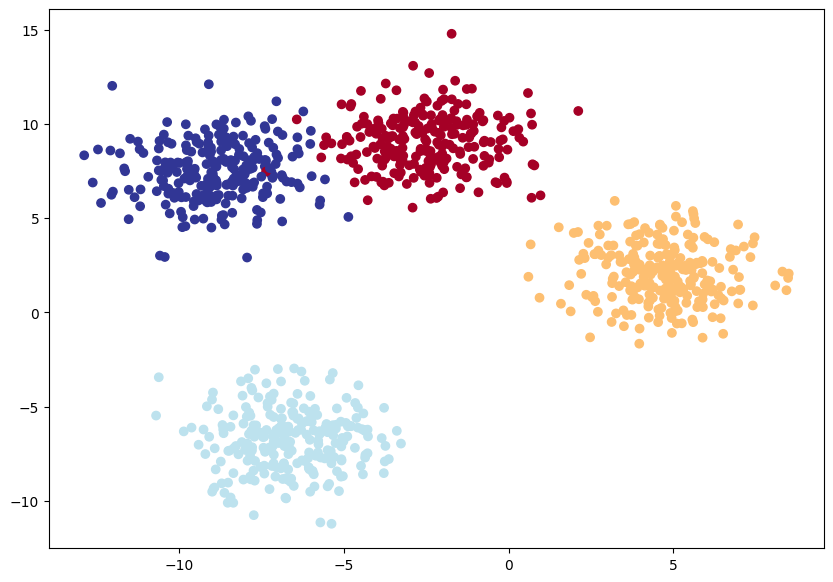

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set the hyperparameters

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. Create multi class data

X_blob , y_blob = make_blobs(n_samples = 1000,
                             n_features = NUM_FEATURES,
                             centers = NUM_CLASSES,
                             cluster_std = 1.5,
                             random_state = RANDOM_SEED)

#Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# Split into train and test
X_blob_train , X_blob_test , y_blob_train , y_blob_test = train_test_split(X_blob,
                                                                           y_blob,
                                                                           test_size = 0.2,
                                                                           random_state= RANDOM_SEED)

#4. Plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[: , 0] , X_blob[ :, 1] , c = y_blob , cmap = plt.cm.RdYlBu)

In [ ]:
### Building a multiclass classification model


device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#Calculate Accuracy
def accuracy_fn(y_pred , y_true):
  correct = torch.eq(y_true , y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [ ]:
class BlobModel(nn.Module):
  def __init__(self , input_features , output_features , hidden_units = 8):
    """ Initializes multi class classification model
    Args :
        input_features(int) : Number of input features to the model
        output_features(int) : Number of output_features
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features , out_features= hidden_units),
        nn.Linear(in_features = hidden_units , out_features = hidden_units),
        nn.Linear(in_features = hidden_units , out_features = output_features)
    )

  def forward(self , x):
    return self.linear_layer_stack(x)

In [ ]:
model_4 = BlobModel(input_features = 2,
                    output_features = 4,
                    hidden_units= 8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
loss_fn_4 = nn.CrossEntropyLoss()

optimizer_4 = torch.optim.SGD(params = model_4.parameters(),
                              lr = 0.01)

In [ ]:
#Building the training and testing loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train , y_blob_train = X_blob_train.to(device) , y_blob_train.to(device)
X_blob_test , y_blob_test = X_blob_test.to(device) , y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)

  y_preds = torch.softmax(y_logits , dim = 1).argmax(dim = 1)

  loss = loss_fn_4(y_logits , y_blob_train)

  acc = accuracy_fn(y_pred = y_preds , y_true = y_blob_train)

  optimizer_4.zero_grad()

  loss.backward()

  optimizer_4.step()

  model_4.eval()

  with torch.inference_mode():

    test_logits = model_4(X_blob_test)

    test_loss = loss_fn_4(test_logits , y_blob_test)

    test_preds = torch.softmax(test_logits , dim = 1).argmax(dim=1)

    test_acc = accuracy_fn(y_pred = test_preds , y_true = y_blob_test)

  if epoch!=0 and epoch % 10 == 0:
    print(f"Epoch : {epoch} | Train Loss : {loss:.4f} | Train accuracy : {acc:.2f}% | Test Loss : {test_loss:.5f} | Test accuracy : {test_acc:.2f}%")


Epoch : 10 | Train Loss : 0.6369 | Train accuracy : 79.50% | Test Loss : 0.61222 | Test accuracy : 88.00%
Epoch : 20 | Train Loss : 0.4694 | Train accuracy : 97.75% | Test Loss : 0.45865 | Test accuracy : 98.00%
Epoch : 30 | Train Loss : 0.3734 | Train accuracy : 98.50% | Test Loss : 0.36771 | Test accuracy : 99.00%
Epoch : 40 | Train Loss : 0.3101 | Train accuracy : 98.62% | Test Loss : 0.30659 | Test accuracy : 99.00%
Epoch : 50 | Train Loss : 0.2649 | Train accuracy : 98.88% | Test Loss : 0.26227 | Test accuracy : 99.00%
Epoch : 60 | Train Loss : 0.2308 | Train accuracy : 98.88% | Test Loss : 0.22853 | Test accuracy : 99.50%
Epoch : 70 | Train Loss : 0.2043 | Train accuracy : 99.12% | Test Loss : 0.20197 | Test accuracy : 99.50%
Epoch : 80 | Train Loss : 0.1831 | Train accuracy : 99.12% | Test Loss : 0.18057 | Test accuracy : 99.00%
Epoch : 90 | Train Loss : 0.1658 | Train accuracy : 99.12% | Test Loss : 0.16301 | Test accuracy : 99.00%


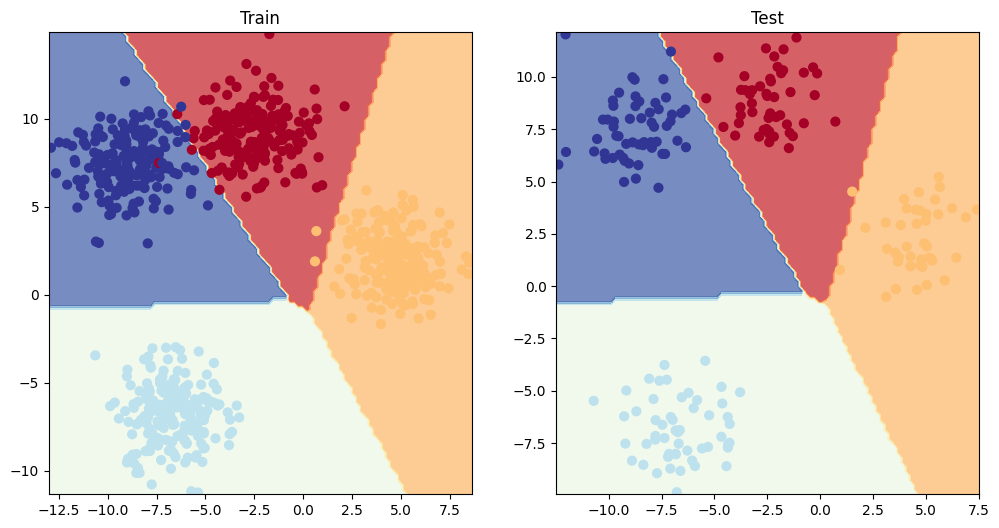

In [ ]:
#Make predictions

from helper_functions import plot_predictions , plot_decision_boundary
model_4.eval()

with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

y_pred_probs = torch.softmax(y_logits , dim=1)

y_preds = torch.argmax(y_pred_probs , dim =1)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4 , X_blob_train , y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4 , X_blob_test , y_blob_test)

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 5.2 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

accuracy = Accuracy(task="multiclass" , num_classes=4).to(device)

print(f"Accuracy is : {accuracy(y_preds , y_blob_test) * 100} %")

Accuracy is : 99.0 %
